# Ковальчуков Александр

#### Математическая робототехника и искусственный интеллект

# Задача 1


### DTMF технология



In [1]:
from scipy.fftpack import fft, ifft, fftshift
import numpy as np
import matplotlib.pyplot as plt

keys = ['1','2','3','4','5','6','7','8','9','*','0','#']
rowTones = np.array([697, 770, 852, 941]);
colTones = np.array([1209, 1336, 1477]);
fs = 8000
ts = 1/8000

phoneNumber = '89057428569'
phoneNumber = list(phoneNumber)
phoneNumber

['8', '9', '0', '5', '7', '4', '2', '8', '5', '6', '9']

In [2]:
def mySNR(sig,noise):
    return 10*np.log10(np.sum(np.abs(sig)**2)/np.sum(np.abs(noise)**2))

In [3]:
def myDFT_AmplPlot(t, x, N=512, fs = False, xLim = 0.5):

    if len(x)>512:
        N = len(x)

    xFFT = fftshift(fft(x, N))
    # Амплитуда спектра
    xA = np.abs(xFFT)

    xList = [x, xA]
    titles = ['Сигнал', 'Спектр']

    # Графики
    plt.figure(figsize=(12, 6))
    for i, sig in enumerate(xList):
        plt.subplot(2, 2, i+1)
        plt.title(titles[i])
        if i == 0:
            plt.plot(t, sig)
            plt.xlabel('Временные отсчёты')
            #plt.xlim([-0.25, len(x)-0.75])
        else:
            if fs == False:
                plt.plot(np.arange(-np.floor(N/2), np.floor((N+1)/2))/N,sig)
                plt.xlabel('Частотные отсчёты')
                plt.xlim([0, xLim])
                plt.xticks(np.linspace(0, xLim, 11))
            else:
                plt.plot(fs*np.arange(-np.floor(N/2), np.floor((N+1)/2))/N,sig)
                plt.xlabel('Частоты')
                plt.xlim([0, fs*xLim])
                plt.xticks(np.linspace(0, fs*xLim, 11))
        plt.grid()
    plt.tight_layout()

In [4]:
def encode(phoneNumber):
    y = [0]
    for char in phoneNumber:
        try :
            i = keys.index(char)
        except ValueError as e:
            print(e)
            continue
        ind1 = rowTones[(i)//3] #row
        ind2 = colTones[(i)%3] #column
        #print(ind1,',',ind2)
        # длительность нажатия
        dur1=0.3
        #dur1=0.3 + 0.2*np.random.uniform(-1/2,1/2);
        # длительность тишины
        dur2=0.15
        #dur2=0.15 + 0.1*np.random.uniform(-1/2,1/2);

        t = np.arange(0,dur1,ts)
        sig = np.sin(2*np.pi*ind1*t) + np.sin(2*np.pi*ind2*t)    
        n = int(dur2*fs)

        y = y + list(sig) + [0] * n
        
    y_orig = y
    y = np.array(y) + 0.5 * np.random.randn(len(y))
    print('SNR: ', mySNR(y_orig, y))
    return y

SNR:  -1.4035444877664085


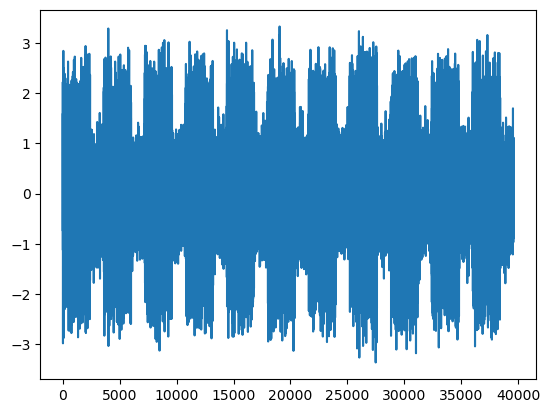

In [5]:
y = encode(phoneNumber)
plt.plot(y)

In [6]:
import IPython
from scipy.io import wavfile
IPython.display.Audio(y,rate=fs)

Как обнаружить закодированные частоты?

**В папке signals есть 10 тестовых сигналов, которые надо раскодировать и понять, какой номер был набран.**

#### Посмотрим на длительности файлов

In [7]:
for i in range(10):
    fs, sig = wavfile.read('signals\phoneNumber'+str(i)+'.wav')
    length = sig.shape[0] / fs
    print(fs, sig.shape[0], length)

8000 39948 4.9935
8000 39240 4.905
8000 38263 4.782875
8000 38863 4.857875
8000 40509 5.063625
8000 41461 5.182625
8000 39807 4.975875
8000 35829 4.478625
8000 37857 4.732125
8000 39364 4.9205


#### Длительность разная. Взглянем на сигналы. Может быть цифры набираются с равным промежутком?

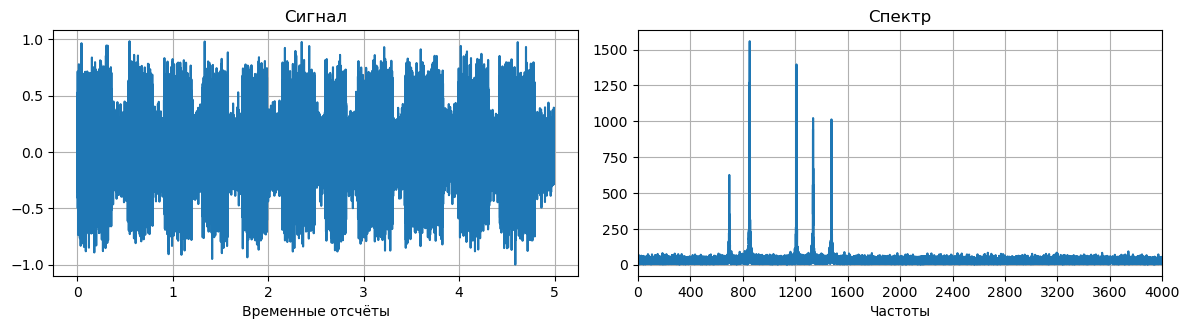

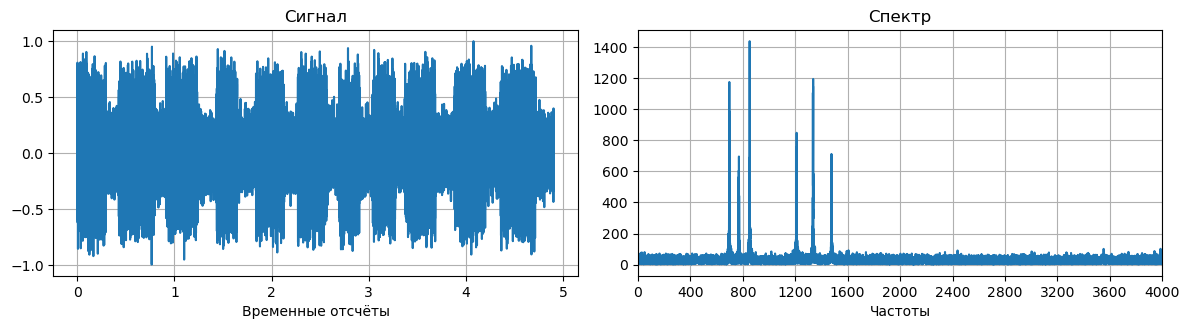

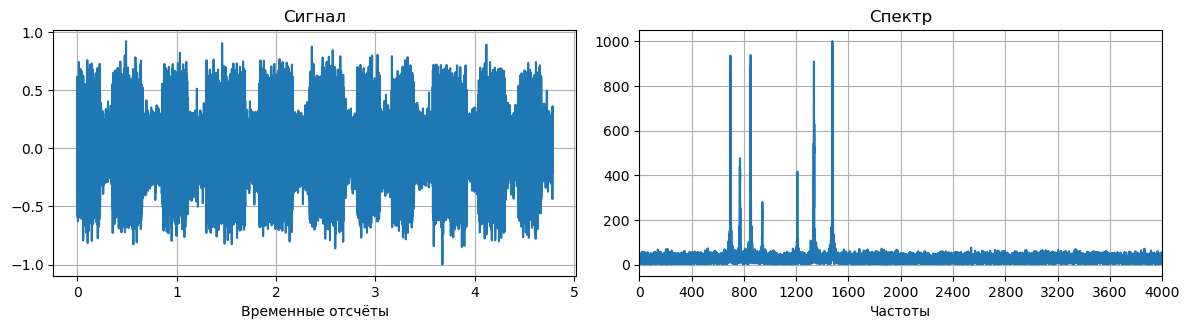

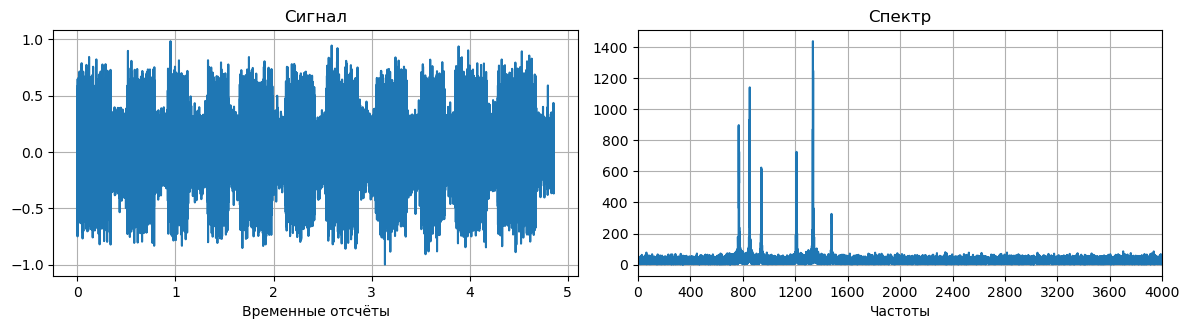

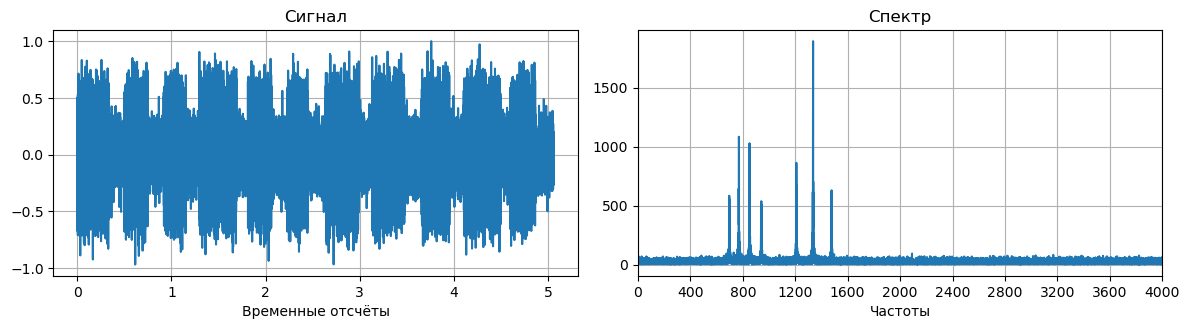

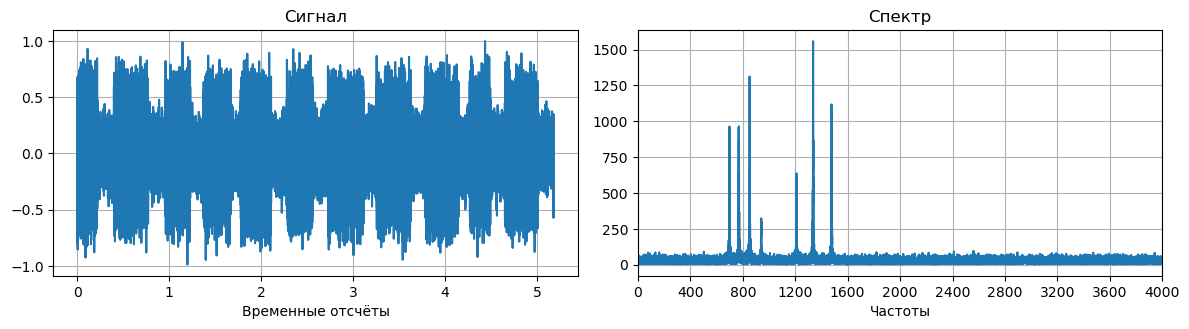

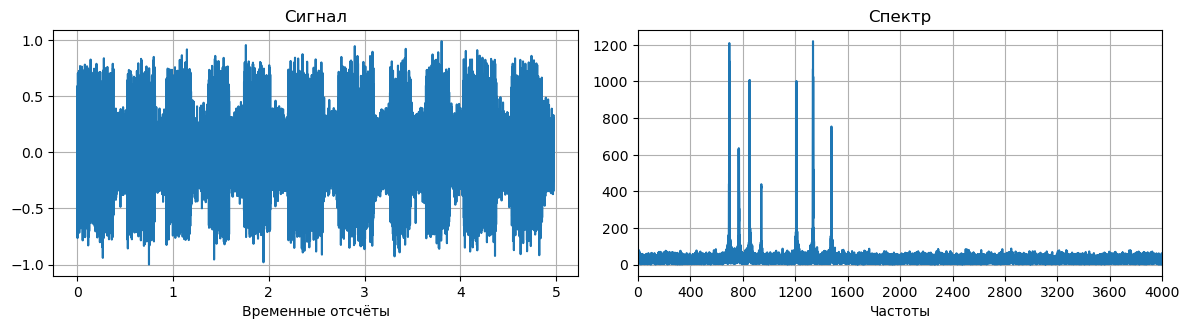

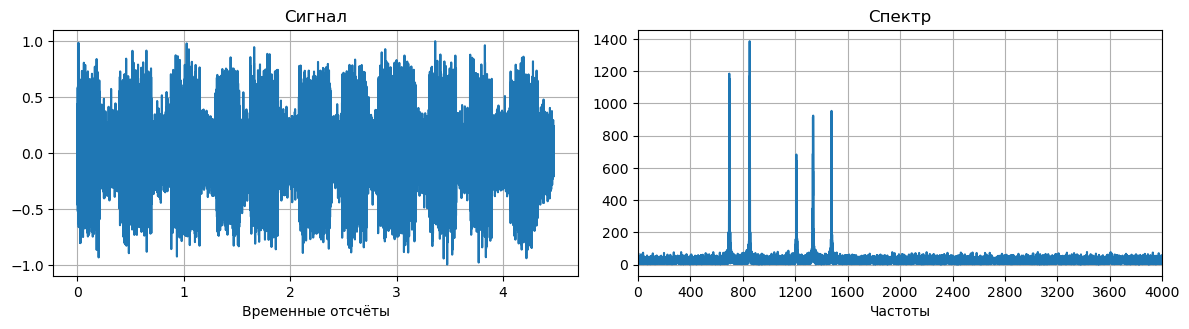

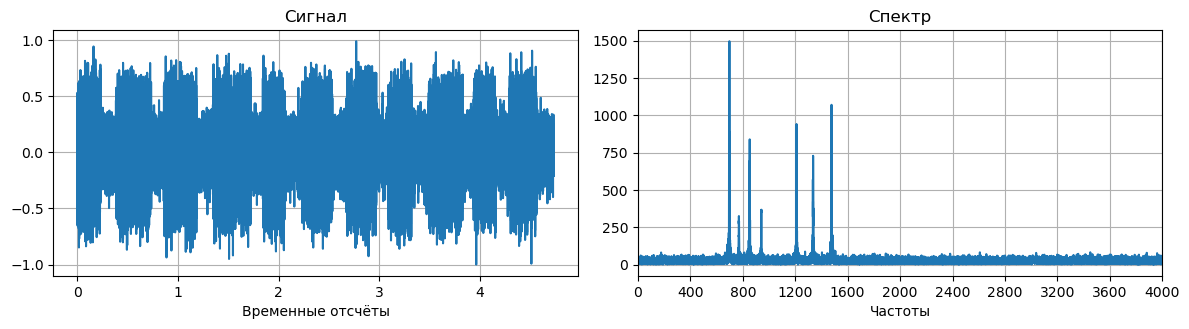

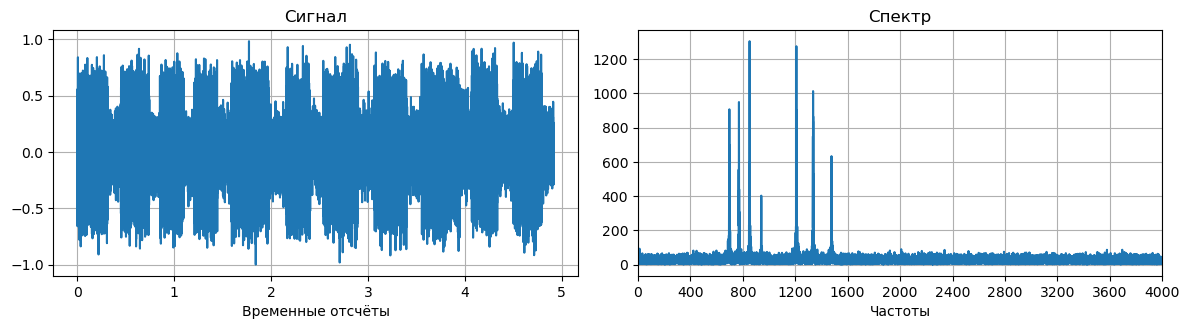

In [8]:
sample_count = 100
for i in range(10):
    fs, sig = wavfile.read('signals\phoneNumber'+str(i)+'.wav')
    sig = np.array(sig)
    N = sig.shape[0]
    duration = N / fs

    t = np.linspace(0, duration, N)
    myDFT_AmplPlot(t=t, x=sig, fs=fs)

#### Тоже мимо. Будем делить сигнал на семплы и надеяться, что две цифры не попадут в один семпл.

In [16]:
sampleN = 500
xLim = 2000
for i in range(10):
    fs, sig = wavfile.read('signals\phoneNumber'+str(i)+'.wav')
    sig = np.array(sig)
    N = sig.shape[0]
    duration = N / fs
    amp = np.abs(fftshift(fft(sig)))
    for k in range(int(N / sampleN)):
        sample = sig[k*sampleN : (k+1)*sampleN]
        sampleA = np.abs(fftshift(fft(sample)))
        '''
        посчитаем что-то вроде скошенности.
        По идее, готовый метод для скошенности есть в scipy, но за ним надо лезть в документацию
        '''
        ratio = np.mean(sampleA) / np.median(sampleA)
        if ratio > 1.2:
            print("+", end='')
        else:
            print(".", end='')
    print()

++++++..+++++.+++++..++++..+++++..++++++.++++..++++++..++++++...+++++.+++++++..
+++++..++++++..+++++...++++..+++++..+++++..++++.+++++.+++++...+++++...++++++..
++++.++++++...++++..+++++++..++++++..++++++..++++.+++++..++++++.+++++..++++.
++++++..+++++..+++...++++.++++++..+++++.++++++...+++++..++++.++++++.+++++++..
++++++..++++..+++++.+++++++..++++...+++...++++++..++++++..++++++..++++++.+++++...
++++..++++++...+++++..+++++.++++++..+++++..+++++++..++++++..+++++++.++++..++++++..
++++++..+++++..++++...++++..+++++..++++++..+++++++..++++..++++...+++++..++++++.
++++..+++++...+++++..++++.++++...+++++..++++.++++++..++++..++++..+++++.
++++..++++++..+++++..+++++++.++++..++++++.++++++.++++..++++++..++++.+++++..
+++++..+++++.+++++.++++..+++++++..+++++.+++++++..++++++..++++++..+++++..+++++.


#### Видно, что получилось "классифицировать" семплы на шум и не шум, и в каждом номере ровно 11 полезных интервалов.

#### Напишем декодер для семпла

In [10]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [11]:
rowTones = np.array([697, 770, 852, 941])
colTones = np.array([1209, 1336, 1477])
numbers = [['1', '2', '3'],
           ['4', '5', '6'],
           ['7', '8', '9'],
           ['*', '0', '#']]

In [12]:
def decode(sig):
    w = fft(sig)
    A = np.abs(w)
    freqs = np.fft.fftfreq(len(w))
    ind = np.argpartition(A, -4)[-4:]
    freq = freqs[ind]
    freq.sort()
    freq = freq[2:]
    real_freq = freq * fs
    row = find_nearest(rowTones, real_freq[0])
    col = find_nearest(colTones, real_freq[1])

    tolerance = 10

    if np.abs(rowTones[row] - real_freq[0]) > tolerance:
        return '.'
    if np.abs(rowTones[row] - real_freq[0]) > tolerance:
        return '.'

    return numbers[row][col]

In [13]:
sampleN = 500
xLim = 2000
S = []
for i in range(10):
    fs, sig = wavfile.read('signals\phoneNumber'+str(i)+'.wav')
    sig = np.array(sig)
    N = sig.shape[0]
    duration = N / fs
    amp = np.abs(fftshift(fft(sig)))
    s = ''
    for k in range(int(N / sampleN)):
        sample = sig[k*sampleN : (k+1)*sampleN]
        sampleA = np.abs(fftshift(fft(sample)))
        ratio = np.mean(sampleA) / np.median(sampleA)
        if ratio > 1.2:
            symbol = decode(sample)
            s += symbol
            print(symbol, end='')
        else:
            s += '.'
            print(".", end='')
    S.append(s)
    print()

888888..99999.22222..1111..99999..888888.9999..777777..999999...77777..777777..
88888..999999..22222...1111..55555..33333..7777.1111..22222...44444...888888..
8888.999999.....22..1111111..333333..999999..0000.5555...888888.13333..6666.
888888..99999..000...5555.555555..55555.444444...44444..7777.888888.0000000..
888888..9999...0000.5555555..2222...777...666666..444444..111111..888888.00000...
8888..999999...00000..55555.111111..12222..4555555..999999..999999..4444..12222...
888888..99999..1111...1111..55554..000000..7777777..9999..3333...11111..555555.
8888..99999...11111..1111.2222...88888..9999.333333..2222..2222..7777..
8888..999999..11111..1111111..888..333331..11111.9999...00000..333..66666..
88888..99999.11111.1111..7777777..44444..55555...00000...111111..66666..88888.


#### Осталось только схлопнуть строчки и напечатать декодированные номера

In [18]:
print('Ответ:')
for s in S:
    for i in range(len(s)):
        if i == 0:
            print(s[i], end='')
        if s[i-1] == '.' and s[i] != '.':
            print(s[i], end='')
    print()


Ответ:
889219897977
889215371248
889213905816
889055544780
889052764180
889051149941
889115079315
889112893227
889118319036
889117450168


# Задача 2

В файле 1.3 STFT был пример использования оконного преобразования Фурье для решения задачи классификации звуков на примере датасета ECS10.

Используя датасет ESC50 

https://github.com/karolpiczak/ESC-50

обучить классификатор аналогичным образом на основе оконного преобразования Фурье. 


In [15]:
import pandas as pd
from tqdm import tqdm
import librosa
import numpy as np
import torch
import torch.nn as nn

dataset = pd.read_csv('D:\Temp\esc50.csv')

ModuleNotFoundError: No module named 'pandas'

In [ ]:
dataset

Вычисление ОПФ

In [ ]:
path = "D:\\Temp\\ECS50\\"

wave_file=dataset.filename[0]
audio, sample_rate = librosa.load(path+wave_file)
freq = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)
freq.shape

Формируем массив с ОПФ

In [ ]:
stft=[]
path = "D:\\Temp\\ECS50\\"

for i in tqdm(range(len(dataset))):
    wave_file=dataset.filename[i]
    audio, sample_rate = librosa.load(path+wave_file)
    freq = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)
    freq=freq.reshape(-1)
    stft.append(freq)


In [ ]:
stft[0].shape

In [ ]:
221400/1025

Нормализация данных

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(stft)

normalized_stft = scaler.transform(stft)

print(np.amax(stft))
print(np.amax(normalized_stft))

In [ ]:
features_convolution = np.reshape(normalized_stft,(2000, 1, 1025, -1))
features_convolution.shape

One-hot encoding для меток классов

In [ ]:
labels = np.array(dataset.target)

def encode_labels(labels, num_of_classes): #encoding the classes into a tensor of shape (11) with 0 and 1s.
    num = len(labels)
    target = torch.zeros(num, num_of_classes).float()
    for i, l in enumerate(labels):
        target[i, l] = 1
    return target

target = encode_labels(labels, 50)
print(target.shape)
print(target[1])

In [ ]:
labels[1]

Датасет:

In [ ]:
X = features_convolution
y = target

Стратифицированное разбиение на тестовую и тренировочную части. Стратифицированное значит, что количество примеров для каждого из классов одинаково в обучающей и тестовой выборке (по 32 и 8 соответственно).

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
# Initialize the StratifiedShuffleSplit object
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Split the data into training and testing sets
for train_index, test_index in sss.split(X, y):
    X_train = X[train_index]
    y_train = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]

print("Size of the training set : ", X_train.shape, y_train.shape )
print("Size of the testing set : ", X_test.shape, y_test.shape  )

#train_df = train_df[['data','target']]
#test_df = test_df[['data','target']]



In [ ]:
print("Size of the training set : ", X_train.shape, y_train.shape )
print("Size of the testing set : ", X_test.shape, y_test.shape  )


Далее, подобрать модель и обучить. 
...

# ЗАДАЧА 3

Разработать полосно-заграждающий КИХ-фильтр для удаления шума одной частоты из аудио-сигнала. Подгрузим сигнал.
Для того, чтобы качество очищения от шума можно было услышать, добавим шум на частоте, например, 500 Гц.

In [ ]:
from scipy.io import wavfile

import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftshift, rfft
from scipy import signal
import IPython

def myDFT_AmplPlot(t, x, N=512, fs = False, xLim = 0.5):
    
    if len(x)>512:
        N = len(x)
        
    xFFT = fftshift(fft(x, N))
    # Амплитуда спектра
    xA = np.abs(xFFT)

    xList = [x, xA]
    titles = ['Сигнал', 'Спектр']

    # Графики
    plt.figure(figsize=(12, 6))
    for i, sig in enumerate(xList):
        plt.subplot(2, 2, i+1)
        plt.title(titles[i])
        if i == 0:
            plt.plot(t, sig)
            plt.xlabel('Временные отсчёты')
            #plt.xlim([-0.25, len(x)-0.75])
        else:
            if fs == False:
                plt.plot(np.arange(-np.floor(N/2), np.floor((N+1)/2))/N,sig)
                plt.xlabel('Частотные отсчёты')
                plt.xlim([0, xLim])
                plt.xticks(np.linspace(0, xLim, 11))
            else:
                plt.plot(fs*np.arange(-np.floor(N/2), np.floor((N+1)/2))/N,sig)
                plt.xlabel('Частоты')
                plt.xlim([0, fs*xLim])
                plt.xticks(np.linspace(0, fs*xLim, 11))
        plt.grid()
    plt.tight_layout()

In [ ]:
fs, data = wavfile.read('source/LetsGo.wav')
data = data/np.max(data)

In [ ]:
IPython.display.Audio(data, rate=fs)

In [ ]:
w = 500
t = np.arange(0,len(data)) / fs
noise = np.sin(2*np.pi*w*t)
y_noised = data + 0.75*noise

IPython.display.Audio(y_noised, rate=fs)

In [ ]:
myDFT_AmplPlot(t, y_noised, fs = fs, xLim=0.03)

Создать фильтр одним из способов

    signal.remez()
    signal.firls()
    signal.firwin() 

In [ ]:
....

bs_filter=...
...

In [ ]:
# Вывод АЧХ фильтра
w, h = signal.freqz(bs_filter, [1], fs=fs)

plot_response(w, h, fs, "Band-stop Filter")
plt.xlim(0, 0.05*fs)

Провести фильтрацию сигнала...

In [ ]:
y_filt = ...

In [ ]:
# график отфильтрованного сигнала
myDFT_AmplPlot(t, y_filt, fs = fs, xLim=0.03)

Сравнение спектров исходного сигнала и отфильтрованного.

In [ ]:
yFFT = np.abs(fft(y_filt))
dataFFT = np.abs(fft(data))
N = len(yFFT)
sig = np.array([dataFFT, yFFT]).T
t= np.arange(N)*fs/N

plt.plot(t,sig)
plt.xlabel('Частоты')
plt.xlim([0, fs*0.05])

# Задача 4

Напишите код для генерации звучания ноты по заданной частоте в герцах и длительности в секундах с помощью фильтра Карплюса-Стронга. 

In [ ]:
from random import random
from scipy.io.wavfile import write
from scipy.signal import lfilter, freqz

import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display

# получение коэффициентов фильтра Карплюса-Стронга
def get_KS_filter(M, alpha):
    b = np.array([1]) 
    a = np.array([1] + ([0]*(M-1)) + [-alpha]) 
    return b,a   

In [ ]:
# код для генерации ноты
def get_note(freq, dur, fs):    
    ...
    return sig 

In [ ]:
Далее, для формирования мелодии по списку нот (или частот) удобно написать специальный метод:

In [ ]:
def get_melody(melody, fs):
    dur = 0.5
    x = []
    for note in melody:
        x = x + list(get_note(note, dur, fs))        
    
    return np.array(x)

Сформируем некоторую мелодию.


In [ ]:
notes = ['A', 'A#', 'Bb', 'B', 'C', 'C#', 'Db', 'D', 'D#', 'Eb', 'E', 'F', 'F#', 'Gb', 'G', 'G#', 'Ab']
valueSet = [0,1,1,2,3,4,4,5,6,6,7,8,9,9,10,11,11]

noteDict = dict(zip(notes, valueSet))

song = ['A','A','E','E' ,'F#' ,'F#','E', 'E', 'D','D', 'C#','C#','B','B','A']

melody = [440 * 2 ** (noteDict[note]/12) for note in song]

In [ ]:
x = get_melody(melody, fs)

display.Audio(x, rate=44100, embed=True)

 # Задача 5
 
 В файле `LMS on.ipynb` был реализован LMS алгоритм для фильтрации сигнала. 
 
 Требуется решить ту же задачу фильтрации сигнала с помощью фильтра Винера.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Создаём сигнал
t = np.linspace(0,1,10000, endpoint = False)
# желаемый сигнал
desired = np.sin(2*np.pi*20*t)
# сигнал на входе
sig = desired + 0.5*np.random.randn(len(desired)) + np.sin(2*np.pi*80*t)

plt.plot(t,sig)

In [ ]:
X_train = sig[:int(len(sig) * 0.8)]
X_test = sig[int(len(sig) * 0.8):]

Y_train = desired[:int(len(desired) * 0.8)]
Y_test = desired[int(len(desired) * 0.8):]

Найти коэффициенты фильтра Винера, решением СЛАУ, где значения матрицы и вектора получены с помощью корреляций.

In [ ]:
...
weiner_coefs= ...

In [ ]:
w,h = freqz(weiner_coefs, [1], fs=10000) 

def plot_response(w, h, fs, title):
    plt.figure(figsize=(5,2))
    plt.plot(w, 10*np.log10(np.abs(h)))
    plt.ylim(-40, 5)
    plt.xlim(0, 0.5*fs)
    plt.grid(True)
    plt.xlabel('Частота')
    plt.ylabel('Амплитуда (дБ)')
    plt.title(title)
    
plot_response(w, h, 10000, "НЧ фильтр")
plt.xlim(0, 0.05*10000)

In [ ]:
from scipy.signal import lfilter
s_hat = lfilter(weiner_coefs,[1],X_test)

In [ ]:
plt.plot(Y_test)
plt.plot(s_hat)